In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
Data = pd.read_csv(r"C:\Users\SHIVA KUMAR\Downloads\Regrerssion_energy_production_data (1).csv")
Data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [53]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [54]:
Data.columns


Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [55]:
Data.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


# Feature Engineering with Univariate Feature Selection

In [92]:
#independent varibales and dependent variable
X = Data.iloc[:,0:4]
y = Data.iloc[:, 4]

In [95]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression, k=4)  # Select the top 2 features (you can change 'k' as needed)
X_new = selector.fit_transform(X, y)


In [96]:
selected_features_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_features_indices]

feature_scores = selector.scores_[selected_features_indices]

for feature, score in zip(selected_features, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

Feature: temperature, Score: 85097.75524592349
Feature: exhaust_vacuum, Score: 29722.290856321124
Feature: amb_pressure, Score: 3516.043164197852
Feature: r_humidity, Score: 1713.8548285367515


# feature selection with Support Vector Regressor

In [99]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
estimator = SVR(kernel='linear')  # You can choose different kernels ('linear', 'rbf', 'poly', etc.)

rfe = RFE(estimator, n_features_to_select=2, step=1)

rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
feature_ranking = rfe.ranking_

print("Selected Features:")
print(selected_features)

print("\nFeature Ranking:")
for feature, rank in zip(X.columns, feature_ranking):
    print(f"Feature: {feature}, Rank: {rank}")

Selected Features:
Index(['temperature', 'exhaust_vacuum'], dtype='object')

Feature Ranking:
Feature: temperature, Rank: 1
Feature: exhaust_vacuum, Rank: 1
Feature: amb_pressure, Rank: 3
Feature: r_humidity, Rank: 2


# feature selection with Random Forest Regressor

In [107]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [108]:
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator, n_features_to_select=2, step=1)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
feature_ranking = rfe.ranking_

print("Selected Features:")
print(selected_features)

print("\nFeature Ranking:")
for feature, rank in zip(X.columns, feature_ranking):
    print(f"Feature: {feature}, Rank: {rank}")


Selected Features:
Index(['temperature', 'exhaust_vacuum'], dtype='object')

Feature Ranking:
Feature: temperature, Rank: 1
Feature: exhaust_vacuum, Rank: 1
Feature: amb_pressure, Rank: 2
Feature: r_humidity, Rank: 3


# feature selection with Decision Tree Regressor

In [121]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

DecisionTreeRegressor(random_state=42)

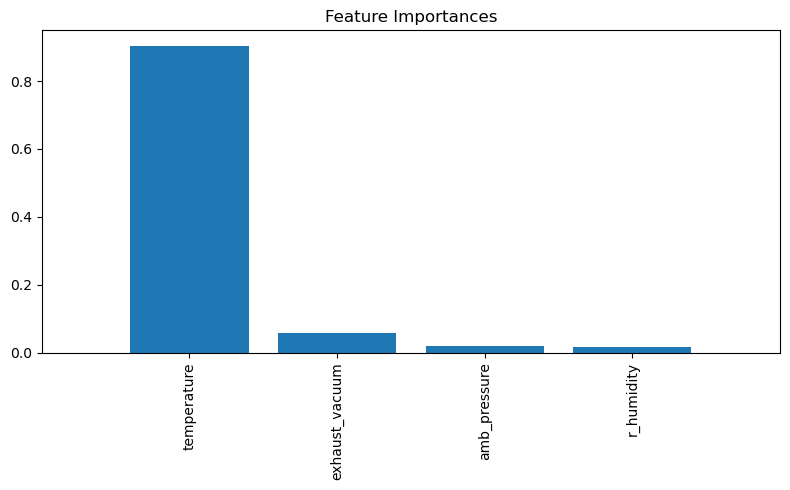

In [122]:
importances = tree.feature_importances_
feature_names = X.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [123]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)


DecisionTreeRegressor(random_state=42)

In [124]:

importances = tree.feature_importances_
feature_names = X.columns

indices = importances.argsort()
rankings = indices.argsort()

In [125]:
threshold = 0.05 

significant_features = importances > threshold

# Display feature importance scores, rankings, and significance
for feature, importance, rank, is_significant in zip(feature_names, importances, rankings, significant_features):
    print(f"Feature: {feature}")
    print(f"Importance Score: {importance:.4f}")
    print(f"Rank: {rank}")
    print(f"Is Significant: {is_significant}")
    print("                            ")

Feature: temperature
Importance Score: 0.9044
Rank: 3
Is Significant: True
                            
Feature: exhaust_vacuum
Importance Score: 0.0589
Rank: 2
Is Significant: True
                            
Feature: amb_pressure
Importance Score: 0.0206
Rank: 1
Is Significant: False
                            
Feature: r_humidity
Importance Score: 0.0161
Rank: 0
Is Significant: False
                            
